### 1. In a command window: conda install pandas-datareader
### 2. Download the adjusted close price for AAPL, INTC, EBAY and AMZN using the following code:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)
aapl = web.DataReader('WIKI/AAPL', 'quandl', start, end)
### 3. Get the data for the last 60 months, select the adjusted monthend close for each.

In [0]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline 

start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)
aapl = web.DataReader('WIKI/AAPL', 'quandl', start, end).sort_index(ascending=True)
intc = web.DataReader('WIKI/INTC', 'quandl', start, end).sort_index(ascending=True)
ebay = web.DataReader('WIKI/EBAY', 'quandl', start, end).sort_index(ascending=True)
amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end).sort_index(ascending=True)

### 4.Use pandas autocorrelation_plot to plot the autocorrelation of the adjusted monthend close of each of the stocks. 

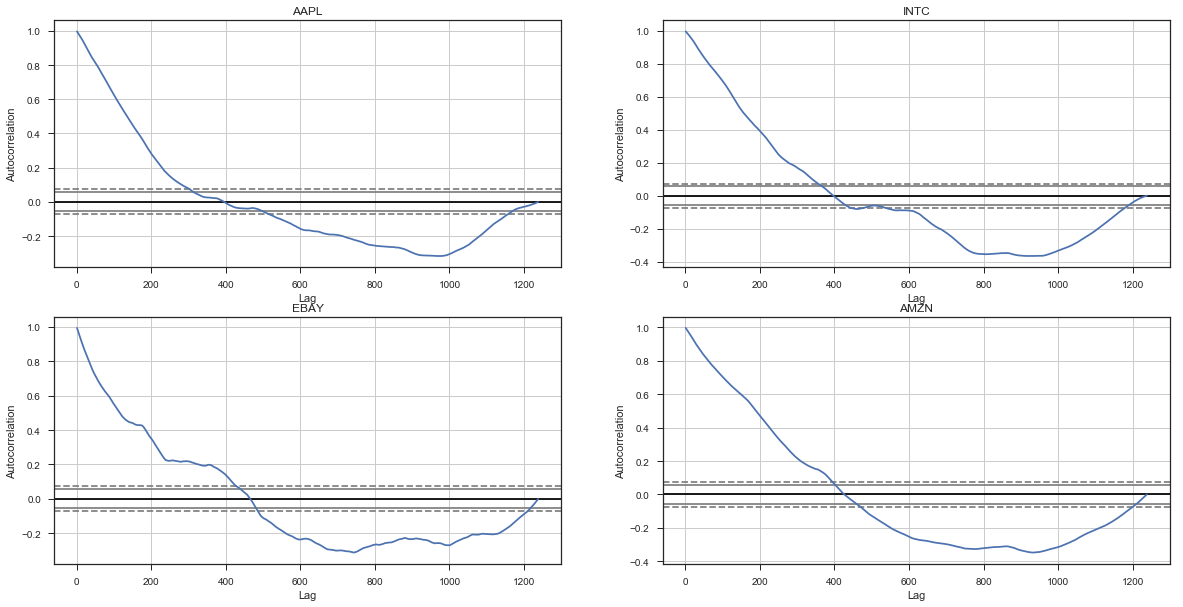

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20, 10))

autocorrelation_plot(aapl.AdjClose,ax=axes[0,0]); axes[0,0].set_title('AAPL');
autocorrelation_plot(intc.AdjClose,ax=axes[0,1]); axes[0,1].set_title('INTC');
autocorrelation_plot(ebay.AdjClose,ax=axes[1,0]); axes[1,0].set_title('EBAY');
autocorrelation_plot(amzn.AdjClose,ax=axes[1,1]); axes[1,1].set_title('AMZN');



### 5.Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting.


In [0]:
#get only the month end entries for each stock
def get_mth_end(stock):
    stock['year'] = stock.index.year
    stock['month'] = stock.index.month
    stock['day'] = stock.index.day

    mth_end = stock.groupby(['year','month'])['day'].max()
    mth_end = mth_end.reset_index()
    return pd.to_datetime(mth_end)


aapl_mth_end = aapl[aapl.index.isin(list(get_mth_end(aapl)))].sort_index(ascending=True)
intc_mth_end = intc[intc.index.isin(list(get_mth_end(intc)))].sort_index(ascending=True)
ebay_mth_end = ebay[ebay.index.isin(list(get_mth_end(ebay)))].sort_index(ascending=True)
amzn_mth_end = amzn[amzn.index.isin(list(get_mth_end(amzn)))].sort_index(ascending=True)


In [0]:
#Monthly_return(t) = AdjColse(t) / AdjColse(t - 1) -1

#Monthly Return for AAPL
aapl_mth_end['Month_return'] = aapl_mth_end.AdjClose/aapl_mth_end.AdjClose.shift(1) -1

#Monthly Return for INTC
intc_mth_end['Month_return'] = intc_mth_end.AdjClose/intc_mth_end.AdjClose.shift(1) -1

#Monthly Return for EBAY
ebay_mth_end['Month_return'] = ebay_mth_end.AdjClose/ebay_mth_end.AdjClose.shift(1) -1

#Monthly Return for AMZN
amzn_mth_end['Month_return'] = amzn_mth_end.AdjClose/amzn_mth_end.AdjClose.shift(1) -1

amzn_mth_end.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,year,month,day,Month_return
Date,,,,,,,,,,,,,,,,
2012-07-31,235.10,236.30,231.6100,233.3000,3453600.0,0.0,1.0,235.10,236.30,231.6100,233.3000,3453600.0,2012,7,31,NaN
2012-08-31,248.07,249.45,245.5001,248.2700,3347500.0,0.0,1.0,248.07,249.45,245.5001,248.2700,3347500.0,2012,8,31,0.064166
2012-09-28,256.14,257.00,253.2000,254.3200,2456600.0,0.0,1.0,256.14,257.00,253.2000,254.3200,2456600.0,2012,9,28,0.024369
2012-10-31,236.32,238.70,230.5000,232.8931,4797600.0,0.0,1.0,236.32,238.70,230.5000,232.8931,4797600.0,2012,10,31,-0.084252
2012-11-30,250.38,252.65,248.2700,252.0500,3797400.0,0.0,1.0,250.38,252.65,248.2700,252.0500,3797400.0,2012,11,30,0.082256


### 6.Use pandas autocorrelation_plot to plot the autocorrelation of the monthly returns. 

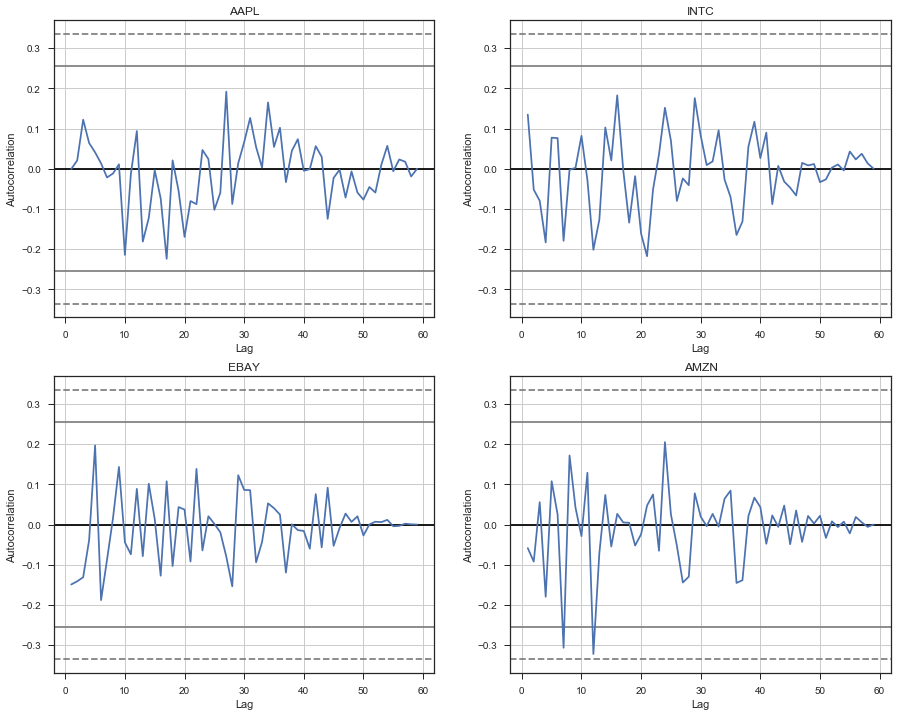

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 12))

autocorrelation_plot(aapl_mth_end.Month_return[1:],ax=axes[0,0]); axes[0,0].set_title('AAPL');
autocorrelation_plot(intc_mth_end.Month_return[1:],ax=axes[0,1]); axes[0,1].set_title('INTC');
autocorrelation_plot(ebay_mth_end.Month_return[1:],ax=axes[1,0]); axes[1,0].set_title('EBAY');
autocorrelation_plot(amzn_mth_end.Month_return[1:],ax=axes[1,1]); axes[1,1].set_title('AMZN');


### 7.Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a725ba8>,
      dtype=object)

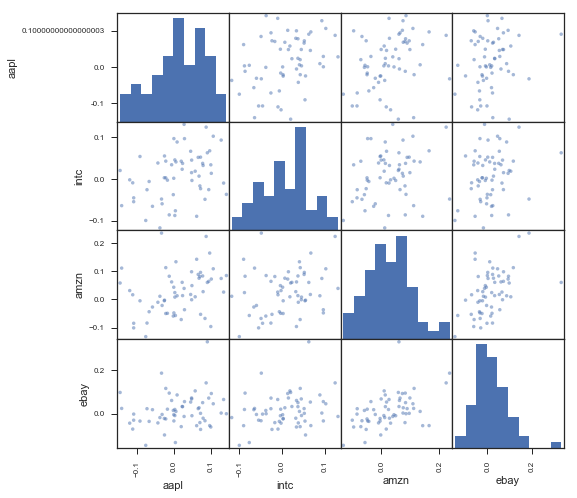

In [0]:
aapl_mth_return = aapl_mth_end[['Month_return']].reset_index().set_index('Date')
aapl_mth_return.rename(columns={aapl_mth_return.columns[0]: "aapl" },inplace = True)

intc_mth_return = intc_mth_end[['Month_return']].reset_index().set_index('Date')
intc_mth_return.rename(columns={intc_mth_return.columns[0]: "intc" },inplace = True)

amzn_mth_return = amzn_mth_end[['Month_return']].reset_index().set_index('Date')
amzn_mth_return.rename(columns={amzn_mth_return.columns[0]: "amzn" },inplace = True)

ebay_mth_return = ebay_mth_end[['Month_return']].reset_index().set_index('Date')
ebay_mth_return.rename(columns={ebay_mth_return.columns[0]: "ebay" },inplace = True)

mth_return = pd.merge(pd.merge(pd.merge(aapl_mth_return, intc_mth_return, left_index=True, right_index=True),amzn_mth_return, left_index=True, right_index=True),ebay_mth_return,left_index=True, right_index=True) 
#mth_return

from pandas.plotting import scatter_matrix
%matplotlib inline 
scatter_matrix(mth_return, figsize = (8,8), diagonal='hist')



### 8. Follow the instructions in
https://glowingpython.blogspot.com/2012/10/visualizing-correlation-matrices.html visualize the correlation of the returns of all pairs of stocks.

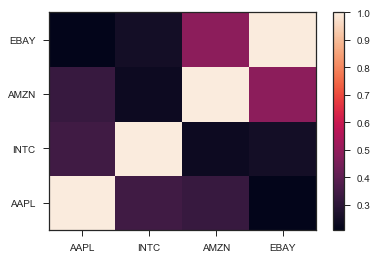

In [0]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

# plotting the correlation matrix
mth_end_return_list = [list(mth_return.aapl[1:]),list(mth_return.intc[1:]),list(mth_return.amzn[1:]),list(mth_return.ebay[1:])]

R = corrcoef(mth_end_return_list)
pcolor(R)
colorbar()
labels=['AAPL','INTC','AMZN','EBAY']
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.yticks(np.arange(len(labels))+0.5,labels)

plt.show()